https://github.com/fedhere/MLPNS2021/blob/main/NHRT/earthquakesCorrell2018.ipynb

In [ ]:
import pandas as pd
import scipy as sp
from scipy import stats
import pylab as pl
import numpy as np

Dimostrazione utilizzando il KStest che a diverse scale di magnitudo, la distanza temporale tra due terremoti segue la stessa distribuzione.

Se è vero, si è in presenza di una scaling law.

Si confrontano i time gap tra terremoti maggiori di magnitudo maggiore di una certa soglia. A soglie diverse, i dati seguono la stessa distribuzione come prova il KStest.

Ipotesi nulla del KStest: le distanze temporali tra terremoti di magnitudo superiore a una certa soglia, a soglie diverse seguono la stessa distribuzione. Testa se due distribuzioni provengono dalla stessa distribuzione.

Pivotal quantity: la distanza massima tra due distribuzioni cumulative

La distribuzione di probabilità di questa statistica dipende dalle dimensioni dei campioni e dalla distanza tra le distribuzioni cumulative.

.csv --> comma separated file: colonne distinte da virgole

L'articolo non è riproducibile perchè non sono disponibili i dati utilizzati e provando a recuperarli si ottengono risultati consistenti ma non identici.

In [ ]:
pd.read_csv('https://raw.githubusercontent.com/fedhere/MLPNS2021/main/NHRT/earthquakes.csv') 
# pandas riconosce i file raw tramite indirizzo url (non gli html!)
# il risultato caricato presenta 1 colonna --> file letto nel modo sbagliato

,#YYY/MM/DD HH:mm:SS.ss ET GT MAG M LAT LON DEPTH Q EVID NPH NGRM
0,1984/01/01 01:30:57.52 eq l 2.02 c 33.24600...
1,1984/01/01 05:31:34.16 eq l 2.12 c 32.94500...
2,1984/01/01 06:59:05.14 eq l 2.43 c 33.34300...
3,1984/01/01 11:10:25.29 eq l 2.07 c 33.66800...
4,1984/01/01 19:38:19.79 eq l 2.13 c 33.96300...
...,...
70793,2002/12/29 19:37:24.56 eq l 2.21 l 35.31400...
70794,2002/12/29 20:17:33.40 eq l 2.02 l 35.32133...
70795,2002/12/29 20:21:28.73 eq l 2.07 l 35.32150...
70796,2002/12/30 21:51:52.55 eq l 2.31 l 35.31867...


In [ ]:
pd.read_csv # sep='' per definire il carattere di separazione delle colonne

<function pandas.io.parsers.read_csv>

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/fedhere/MLPNS2021/main/NHRT/earthquakes.csv', sep=' ') 
# skiprows, nrows, usecols... per importare solo i dati che servono

In [ ]:
data.shape

(70798, 34)

In [ ]:
data.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,LON,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,DEPTH,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,-116.433,NaN,NaN,1.6,C,NaN,NaN,NaN,28255.0,NaN,NaN,13.0,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,-116.295,NaN,NaN,5.4,C,NaN,NaN,NaN,28259.0,NaN,NaN,18.0,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,-117.628,NaN,NaN,5.6,C,NaN,NaN,NaN,28260.0,NaN,NaN,13.0,NaN,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,-116.780,NaN,13.8,C,NaN,NaN,NaN,28270.0,NaN,NaN,19.0,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,19:38:19.79,eq,NaN,l,2.13,c,NaN,NaN,33.963,-116.290,NaN,NaN,2.7,C,NaN,NaN,NaN,28553.0,NaN,NaN,40.0,NaN,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,GT,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 15,Unnamed: 16,LON,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,DEPTH,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
count,0.0,70798.000000,0.0,0.0,70798.000000,70798.00000,0.0,9648.000000,7.359000e+03,4.628900e+04,14096.000000,10889.000000,43932.000000,21302.000000,33735.000000,18080.000000,12705.000000,3387.000000,469.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,2.417826,NaN,NaN,33.977749,-116.88145,NaN,13.354343,6.097558e+06,4.482677e+06,524649.772205,16307.082193,43.634321,141.903530,203.562443,78.426383,55.085714,43.415412,14.746269,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.407683,NaN,NaN,1.156586,1.07667,NaN,2.724517,4.441852e+06,3.130379e+06,281055.136911,25237.230734,121.795817,311.415589,155.337382,56.105321,30.519535,24.266088,17.013243,2.828427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,30.094830,-121.76000,NaN,10.000000,1.000432e+06,1.070000e+02,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.120000,NaN,NaN,33.061000,-117.69200,NaN,11.200000,3.041641e+06,3.031237e+06,136998.250000,27.000000,18.000000,14.000000,113.000000,48.000000,33.000000,24.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.300000,NaN,NaN,34.056750,-116.59000,NaN,12.800000,3.229114e+06,3.110080e+06,703081.500000,57.000000,28.000000,23.000000,168.000000,70.000000,50.000000,38.000000,13.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.590000,NaN,NaN,34.591000,-116.25100,NaN,14.900000,9.669999e+06,9.027968e+06,725926.500000,37764.000000,42.000000,137.000000,294.000000,92.000000,71.000000,61.000000,24.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,7.100000,NaN,NaN,37.985500,-113.71900,NaN,29.300000,3.736673e+07,9.875061e+06,754723.000000,71774.000000,3384.000000,3815.000000,1574.000000,996.000000,227.000000,145.000000,88.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# data.rename?
data = data.rename({"#YYY/MM/DD": "date", "HH:mm:SS.ss": "time", "Unnamed: 5": "mag"}, axis=1) 
# axis : {0 or 'index', 1 or 'columns'}, default 0
# se non si associa il comando alla variabile data (data =) non viene cambiata

In [ ]:
#data.keys()
dataEQ = data[["date", "time", "mag"]]

In [ ]:
dataEQ.head()

,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,19:38:19.79,2.13


In [ ]:
dataEQ.describe()

,mag
count,70798.000000
mean,2.417826
std,0.407683
min,2.000000
25%,2.120000
50%,2.300000
75%,2.590000
max,7.100000


In [ ]:
dataEQ.time.dtype, dataEQ.date.dtype # oggetti

(dtype('O'), dtype('O'))

In [ ]:
pd.to_datetime(dataEQ["time"]) # alcuni secondi arrivano fino a 60 e non è supportato

ParserError: ignored

In [ ]:
for i in range(len(dataEQ["time"])):
  if dataEQ.iloc[i].time.endswith('60.00'):
    print(dataEQ.iloc[i].time)
    print(dataEQ.iloc[i].time[:6] + "59.99")
    dataEQ["time"][i] = dataEQ.iloc[i].time[:6] + "59.99"

04:48:60.00
04:48:59.99


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


14:19:60.00
14:19:59.99
21:48:60.00
21:48:59.99
15:34:60.00
15:34:59.99
06:41:60.00
06:41:59.99


In [ ]:
# si unisce l'orario e la data in un'unica stringa per poterli convertite con to_datetime
dataEQ["datetime"] = pd.to_datetime([dataEQ.iloc[i].date + " " + dataEQ.iloc[i].time for i in range(len(dataEQ))])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dataEQ.head()

,date,time,mag,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


In [ ]:
# selezione dei periodi stazionari
stationary = [(1984, 1986.5), 
              (1990.3, 1992.1), 
              (1994.6, 1995.6),
              (1996.1,1996.5), 
              (1997,1997.6), 
              (1997.75,1998.15), 
              (1998.25,1999.35), 
              (2000.55,2000.8),
              (2000.9 ,2001.25), 
              (2001.6 ,2002), 
              (2002.5 ,2003)] # stationary time periods, dall'articolo
# 1 anno = 365.25 giorni

# da anni in decimale a giorni
ss = []
for p in stationary:
  ss.append((pd.to_datetime(int(p[0]), format = "%Y") 
  + pd.Timedelta('%.f days'%((p[0] - int(p[0])) * 365.25)),
  pd.to_datetime(int(p[1]), format = "%Y") 
  + pd.Timedelta('%.f days'%((p[1] - int(p[1])) * 365.25))))

In [ ]:
# pd.to_datetime?
# pd.Timedelta?

In [ ]:
ss

[(Timestamp('1984-01-01 00:00:00'), Timestamp('1986-07-03 00:00:00')),
 (Timestamp('1990-04-21 00:00:00'), Timestamp('1992-02-07 00:00:00')),
 (Timestamp('1994-08-08 00:00:00'), Timestamp('1995-08-08 00:00:00')),
 (Timestamp('1996-02-07 00:00:00'), Timestamp('1996-07-02 00:00:00')),
 (Timestamp('1997-01-01 00:00:00'), Timestamp('1997-08-08 00:00:00')),
 (Timestamp('1997-10-02 00:00:00'), Timestamp('1998-02-25 00:00:00')),
 (Timestamp('1998-04-02 00:00:00'), Timestamp('1999-05-09 00:00:00')),
 (Timestamp('2000-07-20 00:00:00'), Timestamp('2000-10-19 00:00:00')),
 (Timestamp('2000-11-25 00:00:00'), Timestamp('2001-04-02 00:00:00')),
 (Timestamp('2001-08-08 00:00:00'), Timestamp('2002-01-01 00:00:00')),
 (Timestamp('2002-07-03 00:00:00'), Timestamp('2003-01-01 00:00:00'))]

In [ ]:
goodDates = (((dataEQ.datetime >= ss[0][0]) * (dataEQ.datetime <= ss[0][1])) +\
             ((dataEQ.datetime >= ss[1][0]) * (dataEQ.datetime <= ss[1][1])) +\
             ((dataEQ.datetime >= ss[2][0]) * (dataEQ.datetime <= ss[2][1])) +\
             ((dataEQ.datetime >= ss[3][0]) * (dataEQ.datetime <= ss[3][1])) +\
             ((dataEQ.datetime >= ss[4][0]) * (dataEQ.datetime <= ss[4][1])) +\
             ((dataEQ.datetime >= ss[5][0]) * (dataEQ.datetime <= ss[5][1])) +\
             ((dataEQ.datetime >= ss[6][0]) * (dataEQ.datetime <= ss[6][1])) +\
             ((dataEQ.datetime >= ss[7][0]) * (dataEQ.datetime <= ss[7][1])) +\
             ((dataEQ.datetime >= ss[8][0]) * (dataEQ.datetime <= ss[8][1])) +\
             ((dataEQ.datetime >= ss[9][0]) * (dataEQ.datetime <= ss[9][1])) +\
             ((dataEQ.datetime >= ss[10][0]) * (dataEQ.datetime <= ss[10][1]))).values # array di booleans
# *: and, +: or

/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "
/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [ ]:
goodDates.sum() # numero di terremoti che cadono nei periodi stazionari

18852

In [ ]:
goodDataEQ = dataEQ[goodDates] # broadcasting
goodDataEQ.shape

(18852, 4)

In [ ]:
goodDataEQ.head()

,date,time,mag,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790


In [ ]:
# si rimuovono i terremoti con magnitudo < 2, non inclusi nell'analisi dell'articolo
goodDataEQ = goodDataEQ[goodDataEQ.mag >= 2.0]

In [ ]:
goodDataEQ.shape # non ci sono terremoti con mag >= 2

(18852, 4)

In [ ]:
# calcolo degli intervalli tra i terremoti
goodDataEQ['gaps'] = goodDataEQ.datetime.diff().values.astype(float) # feature ingeneering: creare nuove feature ai fini dell'analisi di ML
# il primo intervallo si crea sottraendo l'ultimo elemento della serie al primo:
# dataEQ.datetime[1:] - dataEQ.datetime[:-1] --> NaT (not a time) come primo valore

In [ ]:
goodDataEQ.head()

,date,time,mag,datetime,gaps
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520,-9.223372e+18
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,1.443664e+13
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5.250980e+12
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,1.508015e+13
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,3.047450e+13


In [ ]:
goodDataEQ.describe()

,mag,gaps
count,18852.000000,1.885200e+04
mean,2.399488,-4.574501e+14
std,0.392436,6.718482e+16
min,2.000000,-9.223372e+18
25%,2.110000,2.736622e+12
50%,2.290000,8.946950e+12
75%,2.570000,2.133966e+13
max,5.800000,1.199632e+17


In [ ]:
goodDataEQ.iloc[0]['gaps'] # il primo valore è negativo --> va eliminato

-9.223372036854776e+18

In [ ]:
goodDataEQ = goodDataEQ.iloc[1:]

In [ ]:
goodDataEQ.head()

,date,time,mag,datetime,gaps
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,1.443664e+13
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5.250980e+12
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,1.508015e+13
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,3.047450e+13
5,1984/01/01,19:39:19.67,2.13,1984-01-01 19:39:19.670,5.988000e+10


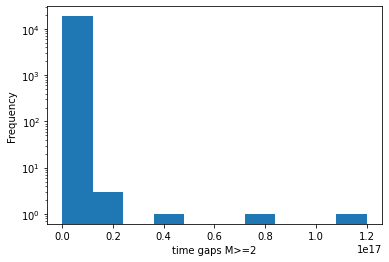

In [ ]:
h = goodDataEQ.gaps.plot(kind = "hist", logy = True); # sintassi per un istogramma in scala log di un dataframe
# oppure
# h = pl.hist(goodDataEQ.gaps, density = 1, log = True);
h.set_xlabel('time gaps M>=2');

Rimuovendo alcuni periodi per selezionare solo quelli stazionari, si sono creati dei gap dell'ordine dei mesi che vanno eliminati

In [ ]:
monthGap = 31*24*3600*10**9 # nanosecondi in un mese
goodDataEQ = goodDataEQ[goodDataEQ.gaps < monthGap]

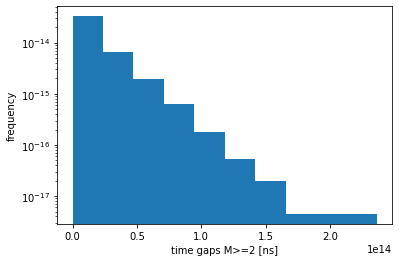

In [ ]:
pl.hist(goodDataEQ.gaps, density = 1, log = True); # density 1 per avere una distribuzione di probabilità, a differenza di quella sopra
pl.xlabel('time gaps M>=2 [ns]');
pl.ylabel('frequency');

è importante fissare prima il p-value!

In [ ]:
alpha = 0.003 # p-value a 3 sigma 

M = [2, 2.5, 3, 3.5, 4] # valori di soglia per la magnitudo

# funzione per riscalare la distribuzione in modo che abbia media 1
def rescale(df, threshold = 0.01):
  times = [] # intervalli riscalati per le 5 soglie di magnitudo
  hHist = [] # altezze dell'istogramma
  binsHist = [] # bin dell'istogramma

  for m in M:
    # si considerano i datetime con magnitudo > della soglia e si calcolano i gap escludendo il primo
    d = df['datetime'][df.mag >= m].diff().values[1:].astype(float)

    # si rimuovono i gap troppo grandi
    d = d[d < 3e16]

    # si rimuovono in due step i gap troppo piccoli --> rescaling
    md = d.mean()
    d = d[d / md >= threshold] / md
    md = d.mean()
    d = d[d / md >= threshold] / md
    md = d.mean()
    d = d / md

    times.append(np.log10(d)) # si prende il logaritmo dei gap

    # istogramma della distribuzione in analisi
    h, bins, patch = pl.hist(times[-1], cumulative = True, density = 1, histtype = "step", label = "mag > %.1f"%m);
    # senza patch non funziona

    hHist.append(h)
    binsHist.append(bins)

  pl.legend()
  pl.xlabel("x: normalized time gap")
  pl.ylabel("P(gap > x)")
  return hHist, binsHist, times

Dopo aver applicato uno scaling, le distribuzioni provengono dalla stessa distribuzione --> si dimostra così la presenza di una scaling law

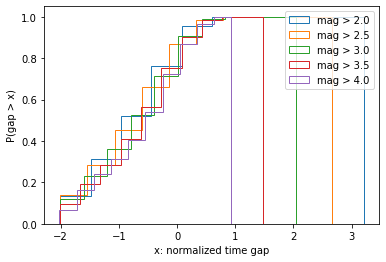

In [ ]:
hHist, binsHist, times = rescale(goodDataEQ, threshold = 0.01)

In [ ]:
for i in range(5):
  for j in range(i+1,5):
    print(i,j, len(times[i]), sp.stats.ks_2samp(times[i], times[j]))

0 1 55029 Ks_2sampResult(statistic=0.024421798669373065, pvalue=7.840288734698088e-07)
0 2 55029 Ks_2sampResult(statistic=0.02783156758143815, pvalue=0.008964817933881711)
0 3 55029 Ks_2sampResult(statistic=0.04997348488794795, pvalue=0.015616950289754891)
0 4 55029 Ks_2sampResult(statistic=0.07884880915760006, pvalue=0.06496354662842414)
1 2 15952 Ks_2sampResult(statistic=0.024344077981193424, pvalue=0.0557018895395464)
1 3 15952 Ks_2sampResult(statistic=0.05532674869908005, pvalue=0.006683342908245431)
1 4 15952 Ks_2sampResult(statistic=0.08253664422871504, pvalue=0.048974048354281235)
2 3 3727 Ks_2sampResult(statistic=0.03951516045971748, pvalue=0.17406022297572912)
2 4 3727 Ks_2sampResult(statistic=0.06755658532380066, pvalue=0.18097855333023538)
3 4 989 Ks_2sampResult(statistic=0.046993462382233446, pvalue=0.7040836524715584)


l'ipotesi nulla è che le distribuzioni cumulative per i 5 campioni provengano dalla stessa parent distribution e avendo ottenuto dal KS test valori per il p-value > alpha non si può rigettare l'ipotesi nulla, quindi si può assumere che la frequenza dei terremoti segue una legge a potenza

serve conoscere la dimensione del campione per il teorema del limite centrale, perchè più è grande e più somiglia alla parent distribution e quindi c'è più confidence

p-value + grande se la dim è < --> inversamente proporzionali

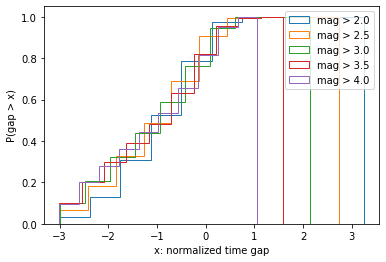

In [ ]:
hHist, binsHist, times = rescale(goodDataEQ, threshold = 0.001)

In [ ]:
for i in range(5):
  for j in range(i+1,5):
    print(i,j, len(times[i]), sp.stats.ks_2samp(times[i], times[j]))

0 1 18667 Ks_2sampResult(statistic=0.021679381565964995, pvalue=0.03471735052985612)
0 2 18667 Ks_2sampResult(statistic=0.02796412951700597, pvalue=0.2585630968398044)
0 3 18667 Ks_2sampResult(statistic=0.0514390285358661, pvalue=0.24501651611093261)
0 4 18667 Ks_2sampResult(statistic=0.06624059968587792, pvalue=0.7078605356286214)
1 2 5608 Ks_2sampResult(statistic=0.023698732365050438, pvalue=1.0)
1 3 5608 Ks_2sampResult(statistic=0.035590250259769994, pvalue=0.7102148495497573)
1 4 5608 Ks_2sampResult(statistic=0.0804176713418252, pvalue=0.4472013101124638)
2 3 1405 Ks_2sampResult(statistic=0.04185229119985941, pvalue=0.622185936303149)
2 4 1405 Ks_2sampResult(statistic=0.06502062797216011, pvalue=0.7417021669869972)
3 4 405 Ks_2sampResult(statistic=0.08281437779962854, pvalue=0.5465591763121812)


L'analisi può comprendere un test sulla validità dei risultati provando a variare le scelte nella preparazione dei dati

(guardare gli extra credits)